# Summary notebook

group number: 1

group members: 

this notebook is summary of 4 part:

1:  features we used in this project

2: The Models we fit 

3: The assumptions that we made and also the limitation of our dataset

4: the final result we got


# Answers of the topic questions

### question 1:

### question 2:

### question 3:

# 1. data downloading and preprocessing

## 1.1 domain data 
/notebooks/1_domain_data/0_postcode_suburb.ipynb:

To begin the Dataset downloading process, we first obtained the past rental dataset through dffh.vic.gov.au. This set contains median rental prices for various suburbs across Victoria up until 2023. After retrieving this data, postcodes corresponding to each suburb was mapped manually and stored as a JSON file in the path: /data/raw/suburb_to_postcodes.json.

Assumption & Limitation: We assumed that the suburb-to-postcode relationship remains consistent across time periods. However, any changes in the official area boundaries may impact our analysis.

/notebooks/1_domain_data/0_data_collection.ipynb:

Approach: This notebook will scrape data from Domain.com using beautiful soup. Detailed property information includes property prices, types, number of bedrooms and other features will be combined into a single file and stored in the path: /data/raw/domain/. 

Assumption & Limitation: Web scraping is limited by the rate at which data can be retrieved without triggering anti-scraping measures. We divided the postcodes into 10 sections and processed them separately to avoid server overload. Additionally, there may be missing values for certain property attributes like cost or property type, depending on the listing details.


In [1]:
import pandas as pd
file_path = '../data/raw/domain/all_properties_preprocessed.csv'
df = pd.read_csv(file_path)
print(df.head(1))

   Unnamed: 0                                      Address   Cost  \
0           0  8/90 Hambleton Street, Middle Park VIC 3206  410.0   

  Property Type  Bedrooms  Bathrooms   Latitude   Longitude  \
0     Apartment         1          1 -37.847553  144.960477   

  Closest Gov Secondary School Gov Secondary Distance Age under 20 Age 20-39  \
0          Albert Park College            1.2 km away          36%       15%   

  Age 40-59 Age 60+  Postcode  
0       30%     19%      3206  


## 1.2 external dataset

### 1.2.1 ABS dataset 

Notebook script: notebook/1_ABS_data/

We retrieved the SA2 district boundary shapefile from the Australian Bureau of Statistics (ABS). This will primarily be used to map and align all external ABS data with the selected group granularity.

The summary population data for Australia from 2001 to 2023 was obtained from abs.gov.au. From this, We renamed the columns and extracted the population information for each SA2 region in Victoria, saved as a CSV file in the path: /data/raw/ABS_population/. 

Population forecasts for the years 2026, 2031, and 2036 were obtained from planning.vic.gov.au. The extracted data includes forecasts at the SA2 level for regions in Victoria and is also saved in the path: /data/raw/ABS_population/. 

The income dataset contains earners per persons, sum, median, and mean income data at each regional level from 2016 to 2020, from which we extracted the average income per person at the SA2 level as a CSV file, and saved it in the path: /data/raw/Income_Statistics/.

All datasets sorted based on the SA2 region are correctly stored in the corresponding path, ready for further preprocessing. 

### 1.2.2 Coles_WWS, Hospital data, PTV, libraries, tourist attractions, parks, and Electricity_Infrastructure.

1: Coles_WWS

This supermarket dataset contains location information for Woolworths and Coles supermarkets in Victoria. The address information for Woolworths supermarkets was scraped from a page on Seibertron.com, while the address database for Coles supermarkets was manually downloaded from the store lookup page on the Coles website. After filtering, these data were correctly stored in a CSV file at the path /data/raw/Coles_WWS/.

2: Hospital data

This hospital dataset contains information about Australian healthcare facilities (including geographic location, facility name, etc.) obtained from Data.gov.au. We extracted the Victorian hospital data as a CSV file by filtering and saved it in the path /data/raw/Hospital/.

3: PTV

We retrieved the PTV dataset via URL, which is a zip archive containing coordinates and names of 11 different types of transit stops. We extracted the six most representative transit station data (Regional Train, Metropolitan Train, Metropolitan Tram, Metropolitan Bus, Regional Coach, Regional Bus) from the unpacked dataset, converted them into six parquet files. We then checked the data to ensure there were no identical duplicate values (preprocess part), and saved them at the path /data/raw/PTV/un_preprocess.

4: libraries, tourist attractions, and parks

We downloaded and extracted shapefiles via URL, containing geographic location data for libraries, tourist attractions, and parks. Before saving them as three additional datasets, we checked the data to ensure there were no identical duplicate values and missing values, and then saved them in the path /data/raw/three_external. 

5: Electricity_Infrastructure

We retrieved the Electricity Infrastructure data from two URLs (Transmission Substations and Major Power Stations) and stored them in the path /data/landing/Foundation_Electricity_Infrastructure. Afterward, we merged the two datasets, applied preprocessing and filtering to obtain the VIC data containing currently operational foundation electricity infrastructure.

Assumption & Limitation: 

The assumption is that the impact of the location of these facilities on rental prices is constant and stable, and that no other factors alter this impact. 

The limitation is that these datasets only provide information related to geographic coordinates and do not contain information that may affect the rental price to some extent such as changes in the size of the facility, its service capacity, or its surroundings,etc.

#### The corresponding notebook scripts for each dataset are as follows:

Coles_WWS: /notebook/1_Coles_WWS_data/

Hospital data: /notebook/1_Hospital_data/

PTV: /notebooks/1_PTV_data/

libraries, tourist attractions, and parks: /notebooks/1_three_external_data/

Electricity_Infrastructure: /notebooks/1_Electricity_Infrastructure_data/


### 1.2.3 Crime dataset

The detailed crime statistics on the number of criminal incidents data was collected from Crime Statistics Agency [9], we then selected the criminal incidents and rate per 100000 population by police region and local government area from April 2014 to March 2024. And save these data as a csv file in the path: /data/raw/Crime/ .

Notbook scripts:/notebooks/1_Crime_data/

##### Assumption & Limitation: 
The dataset assumes that the impact of crime rates on rental prices within police precincts and local government areas remains consistent throughout the time period, while not being able to take into account conditions such as the type of crime, the severity of the crime, or the community's subjective perception of safety, which may affect the rent of a house

### 1.2.4 LGA/Postal shapefile

in this part, we obtained additional external datasets: LGA/Postal shapefile which comes from the website [10], from which we downloaded and extracted some shapefiles containing postal district codes and names, area details, as well as various geometry data, etc. 

/notebooks/1_LGA_data/

# 2 api distance

We use osrm (https://project-osrm.org/) by calling their api to calculate car distance from each properties to public facilities such as hospital. Then save them as csv files in the path: /data/raw/domain/ for further modeling.

Notebook script: /notebooks/2_api_distance/

##### Assumption & Limitation: 
It is assumed that public facilities (e.g., hospitals) and the road network remain constant over the forecast period. But these data do not have the means to account for real-time traffic conditions or road closures, which may result in discrepancies between the calculated drive and the actual situation

# 3 forcasting model

In this section，we use ARIMA model or simple linear model to forcast the data of population, income, and crime, then save them as csv files.

1. population

we choose ARIMA model to forcast the population data from 2024 to 2027, and save them  as a csv file named population_forecast_2024_2027.csv in the path
/data/raw/ABS_population/.

2. income

We choose a linear regression model to backcasting to get the value of income for 2015, and also forecasts the value of income for 2021-2027, and then save them as a csv file named income_forecast_2015_2021to2027.csv in path: /data/raw/Past_income_population_preprocessed/.

3. crime 

we choose to fit ARIMA model again to forcast the crime data from 2024 to 2027, then save this data as a CSV file named crime_forecast_2024_2027.csv in the path: 
/data/raw/ABS_population/.


##### Assumption & Limitation: 
ARIMA model (population and crime)
The model assumes that historical trends and seasonality in the population and crime data will remain stable over the forecast period without major disturbances or structural changes.
However, because the ARIMA model is very sensitive to external factors, any events, policy changes (e.g., immigration policy) that are not reflected in the historical data may affect the accuracy of the results to some extent.

Linear Model (Income)
This model assumes that income changes linearly over time and that economic factors affecting the level of income remain stable and unaffected by sudden changes in policy, economic or market conditions.
Therefore, the model may not be able to adequately take into account the effects of economic shocks, policy changes, etc., when backcasting or forecasting incomes, and these factors may affect the accuracy of the forecasts to some extent.

In [9]:
file_path1 = '../data/raw/ABS_population/population_forecast_2024_2027.csv'
df1 = pd.read_csv(file_path1)
print(df1.head(1))

     area code  population 2024  population 2025  population 2026  \
0  201011001.0     20032.475851     21029.078703     21988.267894   

   population 2027  
0     22911.447978  


In [10]:
file_path2 = '../data/raw/Past_income_population_preprocessed/income_forecast_2015_2021to2027.csv'
df2 = pd.read_csv(file_path2)
print(df2.head(1))

      SA2 Code  2015 income  2021 income  2022 income  2023 income  \
0  201011001.0      48752.4      59334.0      61097.6      62861.2   

   2024 income  2025 income  2026 income  2027 income  
0      64624.8      66388.4      68152.0      69915.6  


In [11]:
file_path3 = '../data/raw/ABS_population/crime_forecast_2024_2027.csv'
df3 = pd.read_csv(file_path3)
print(df3.head(1))

  Local Government Area   crime 2024  crime 2025   crime 2026   crime 2027
0                Alpine  2501.430246  2472.82685  2466.194663  2464.656876


Notebook scripts: /models/3_forecasting_model/

# 4 merge past and forcast dataset(income, population, crime)

This part we performed three merges, combining historical and forecast data into a unified format with three columns: Year, region (either Local Government Area or SA2 Code), and the relevant metric (crime, population, or income). The data is then sorted by year and region in ascending order and saved in the path: ../../data/raw/merge_past_forcasting_data/.


Notebook scripts: /notebooks/4_merge_past_future_data/

In [13]:
file_path = '../data/raw/merge_past_forcasting_data/merged_crime_data.csv'
df_merge = pd.read_csv(file_path)
print(df_merge.head(1))

   Year Local Government Area  Incidents Recorded
0  2015                Alpine               299.0


## 5 merge into one dataset

This set of scatter plots shows the relationship between property cost and various distances (such as the CBD, train stations, hospitals, and parks). Overall, the plots suggest that property costs tend to decrease as the distance increases. Properties closer to the CBD, train stations, and other amenities generally have higher costs, while those farther away are less expensive. However, the cost appears to remain constant regardless of the distance to government secondary schools.

Finally, we performed exploratory data analysis (EDA), starting with a correlation heatmap to explore the relationships between all features. Although some features showed some correlation with each other, they capture different dimensions (aspects) of the data. Removing any of them could lead to a loss of important information. To ensure the data diversity and the robustness of the model, we decided to keep all features at this stage. From the graph showing the relationship between income, CBD distance, and property cost, we observed that the closer a property is to the CBD, the higher both the income and property cost tend to be.

Notebook scripts: /notebooks/5_individual_data/

In [2]:
import pandas as pd
file_path = '../data/curated/individual_property_final.csv'
df = pd.read_csv(file_path)
print(df.head(1))

                                       Address        Cost Property Type  \
0  8/90 Hambleton Street, Middle Park VIC 3206  363.738938     Apartment   

   Bedrooms  Bathrooms   Latitude   Longitude Closest Gov Secondary School  \
0       1.0        1.0 -37.847553  144.960477          Albert Park College   

   Age under 20  Age 20-39  ...  Tourist Attraction Distance  \
0          36.0       15.0  ...                       0.5198   

   Grocery Distance    Year   SA2_CODE21  Population   Income  LGA_CODE24  \
0            1.6056  2015.0  206051128.0     16053.0  62962.6     25900.0   

   Incidents Recorded                                 Suburb  \
0              9137.0  Albert Park-Middle Park-West St Kilda   

   Gov Secondary Distance  
0                     1.2  

[1 rows x 29 columns]


## 6 prediction model

#### In this step, we test and compare four different models to determine which one performs best and take it to make predictions about future prices

#### random forest model
First, we loaded the 'individual_property_final.csv' file into a DataFrame to examine and analyze the data and see if there were still possible missing values in the columns.

We then chose to remove 'Address', 'Latitude', 'Longitude' and other locationally relevant extraneous columns, allowing us to focus on features relevant to the model. Once the deletions were complete, the categorical columns 'Property Type' and 'Closest Gov Secondary School' were converted to numeric values via label coding in preparation for model training. 

Subsequently, we chose to split the dataset by year, using the data from 2015-2024 for model training (df_train), while the data from 2025-2027 was retained for future prediction (df_predict). The training data is further split into features (x) and target variables (y), divided into training and test sets in an 80/20 ratio, and a fixed random seed(seed = 37) is used to ensure the reproducibility of the results obtained. 

Next, a RandomForestRegressor model is instantiated and the relationship between the features and the target variable 'Cost' is learned using the training data obtained in the previous step. We evaluate the model performance by predicting property prices on a validation set and calculating the Root Mean Square Error (RMSE) as a measure of prediction accuracy. Finally, the importance of features in the model is extracted, ranked, and visualized using horizontal bar charts to identify the features that contribute most to property price prediction. (shown below)

Notebook path: /models/6_prediction_model/1_random_forest.ipynb

##### Assumption & Limitation: 
We assume that combining multiple decision trees reduces overfitting and captures important patterns in the data. However, this model struggles with high-dimensional data and is less effective for time series with sequence dependencies.

##### feature we chose in this model: 
Train Distance、Bedrooms、Bathrooms、Year、Income、CBD Distance、Tourist Attraction Distance、Electricity Distance、Park Distance、Grocery Distance、Hospital Distance、Library Distance、Age 20-39、Population、Age 60+、Gov Secondary Distance、Incidents Recorded、Age 40-59、Closest Gov Secondary School、Age under 20，and Property Type。

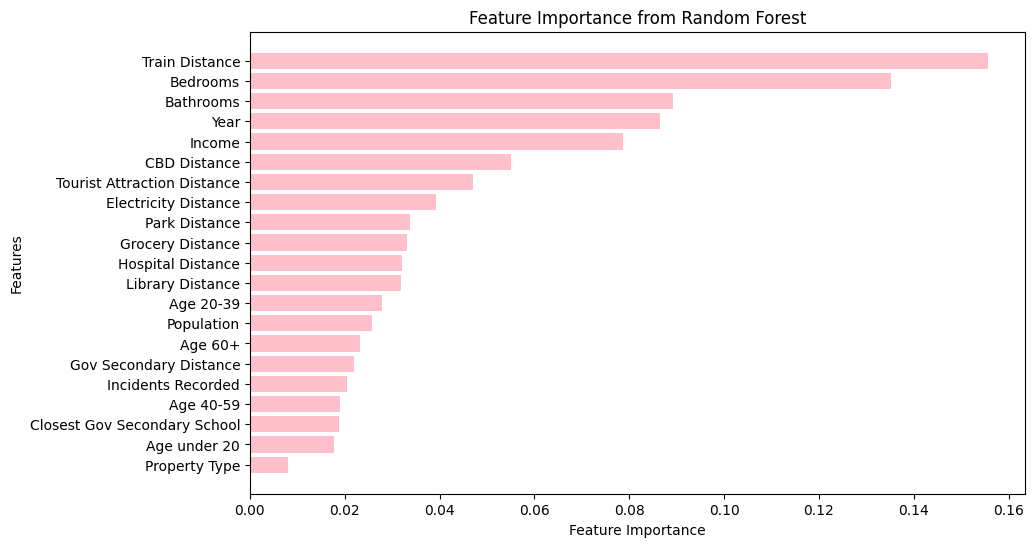

#### linear regression model
We still first load the dataset 'individual_property_final.csv' and select the features required for prediction. And the categorical variable 'Property Type' was label encoded and converted to numeric format.
Next, we use a similar approach as in random forest to divide the data into a training set (df_train, 2015-2024) and a prediction set (df_predict, 2025-2027) by storing the features and the target variable ('Cost') in x and y, respectively, and then further divide the data in an 80-20 ratio into training (X _train, y_train) and validation sets (X_val, y_val), and the reproducibility of the results was ensured by setting random seeds.

To improve model performance and ensure consistent feature scales, we normalize X_train and X_val using StandardScaler. We then trained the linear regression model on the normalized training data and evaluated the baseline performance by calculating the RMSE of the mean prediction of y_val. We then performed predictions on X_val and calculated the RMSE to assess model performance.

To try to obtain a more robust performance estimate of the model, we perform a 5-fold cross-validation and print the average RMSE of the cross-validation.

Next, we utilize the Recursive Feature Elimination (RFE) method to rank the features based on their importance for property cost prediction. We selected the top 10 ranked features and trained new models on them, and then calculated the RMSE again to evaluate and compare the model performance.

Besides, we simplified the df_train dataset by manually removing some features that were correlated with lower importance (features such as 'Property Type' with an importance < 0.03 shown in the plot above). After re-standardizing the data, we trained and validated the new linear regression model on the remaining features and computed the RMSE to evaluate the model performance on this simplified feature set. However, it turned out to be even worse than what was tested in the previous step, so these features might be valuable.

Unfortunately, however, all of the above linear models perform worse than the random forest model, so we do not choose it as the final model.

Notebook path: /models/6_prediction_model/2_linear_model.ipynb

##### Assumption & Limitation: 
We assume there is a linear relationship between the features and the target, with independent errors and no multicollinearity.
However, the model is unable to model complex nonlinear relationships and is also sensitive to outliers and highly correlated features.

##### feature selected in this step :

'Cost', 'Property Type', 'Bedrooms', 'Bathrooms', 
         'Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+', 'CBD Distance', 'Train Distance', 
         'Electricity Distance', 'Hospital Distance', 'Library Distance', 'Park Distance', 
         'Tourist Attraction Distance', 'Grocery Distance', 'Year', 'Population', 'Income', 
         'Incidents Recorded', 'Gov Secondary Distance'

##### top 10 features: 

"Income", "Bedrooms", "Train Distance", "Year", "Bathrooms", "Age under 20", "Hospital Distance", "CBD Distance", "Tourist Attraction Distance", "Age 40-59"

##### feature selected after remove not important features: 

'Cost', 'Bedrooms', 'Bathrooms', 'CBD Distance', 'Train Distance', 'Electricity Distance', 'Hospital Distance', 'Library Distance', 'Park Distance', 'Tourist Attraction Distance', 'Grocery Distance', 'Year', 'Income'

#### LSTM model

We first loaded the individual_property_final.csv dataset and deleted multiple irrelevant columns before coding the labels for the categorical variables 'Property Type' and 'Closest Gov Secondary School' were coded with labels.

We then divided the data into a training set df_train for 2015-2024 and a prediction set df_predict for 2025-2027. Next, features (all columns except 'Cost') and target variables were extracted from df_train 'Cost' and normalized by MinMaxScaler.

We then adapted the input format of the LSTM by defining the function create_sequences by converting the normalized features and target variables into a sequence of 10 time steps.

The generated x and y are used to construct an LSTM model: this LSTM model consists of an LSTM layer with 50 units, a dropout layer with a dropout rate of 0.2, and a fully connected output layer with one unit.this mdoel is compiled using the 'adam' optimizer and the 'mean_squared_error' loss function.

We similarly divided the data into training and test sets in an 80-20 ratio, setting a random seed = 37 to ensure reproducible results. We trained the model using 50 epochs and a batch size of 32 and then validated it using the test set. Then after evaluating the model's loss on the test set, we made predictions for X_test.

After both the predicted and true values are back-converted back to the original scale, we calculate the RMSE between the predicted values and the actual price to evaluate the model performance. And the conclusion is that the model doesn't perform well either, so we don't choose it as out final model。

Notebook path:/models/6_prediction_model/4_LSTM.ipynb

##### Assumption & Limitation: 
We assume that continuous data with dependencies over time and the past data patterns can predict future trends.
However, this model requires a large amount of training data and is sensitive to hyperparameters, making it less suitable for long time dependencies.

##### feature used in this step:  

'Cost','Property Type','Bedrooms','Bathrooms','Closest Gov Secondary School','Age under 20','Age 20-39','Age 40-59','Age 60+',
'CBD Distance','Train Distance','Electricity Distance','Hospital Distance','Library Distance','Park Distance','Tourist Attraction Distance',
'Grocery Distance','Year','Population','Income','Incidents Recorded','Gov Secondary Distance'

#### XGBoost model
Firstly, we load the dataset individual_property_final.csv, remove unwanted columns, and encode labels for the categorical variables 'Property Type' and 'Closest Gov Secondary School'. We similarly divide the data into df_train for 2015-2024 and df_predict for 2025-2027, and further divide the df_train into training and validation sets on an 80-20 scale. From this, we were able to train a basic XGBoost model on the training set and evaluate the performance by RMSE and R² on the test set.

Then, in order to improve the model, we chose to use RandomizedSearchCV for hyperparameter tuning, exploring different parameter combinations to get the best hyperparameters in a 5-fold cross-validation for 100 iterations. This is then used to re-train the model and re-evaluate its performance on the training and validation sets. Its model performance was very good, so we chose it as the final model of choice.

Next, we use the tuned model to predict the FUTURE PRICE for the years 2025-2027.We then merge these predictions back into the original dataset to form the complete historical and predictive data. Finally, we save the results to two CSV files: one for future predictions (prediction_25_to_27.csv) and another for the file containing the full data (final_with_predictions_15_to_27.csv), placing them in the path /data/curated/.

##### Assumption & Limitation: 
We assume that complex patterns can be captured by an ensemble of weighted decision trees.
But this model is more sensitive to noise, so for strong sequential time series data, we need to carefully adjust the hyperparameters to modify on to achieve the best results.

## 王哥似乎说过这里有一定程度的overfitting, 但是在这个topic里面可以无视，我不确定我记的对不对，也不确定是否需要提及这个

##### feature used in this step: 
'Cost','Property Type','Bedrooms','Bathrooms','Closest Gov Secondary School','Age under 20','Age 20-39','Age 40-59',
'Age 60+','CBD Distance','Train Distance','Electricity Distance','Hospital Distance','Library Distance','Park Distance','Tourist Attraction Distance',
'Grocery Distance','Year','Population','Income','Incidents Recorded','Gov Secondary Distance' ​

In [3]:
import pandas as pd

file_path_1 = '../data/curated/prediction_25_to_27.csv'


pd.read_csv(file_path_1).head(1)


,Address,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Age under 20,Age 20-39,Age 40-59,...,Grocery Distance,Year,SA2_CODE21,Population,Income,LGA_CODE24,Incidents Recorded,Suburb,Gov Secondary Distance,Cost
0,"8/90 Hambleton Street, Middle Park VIC 3206",Apartment,1.0,1.0,-37.847553,144.960477,Albert Park College,36.0,15.0,30.0,...,1.6056,2025.0,206051128.0,17139.395883,80778.6,25900.0,8882.008139,Albert Park-Middle Park-West St Kilda,1.2,447.50085


In [4]:
file_path_2 = '../data/curated/final_with_predictions_15_to_27.csv'
pd.read_csv(file_path_2).head(1)

,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Age under 20,Age 20-39,...,Tourist Attraction Distance,Grocery Distance,Year,SA2_CODE21,Population,Income,LGA_CODE24,Incidents Recorded,Suburb,Gov Secondary Distance
0,"8/90 Hambleton Street, Middle Park VIC 3206",363.738938,Apartment,1.0,1.0,-37.847553,144.960477,Albert Park College,36.0,15.0,...,0.5198,1.6056,2015.0,206051128.0,16053.0,62962.6,25900.0,9137.0,Albert Park-Middle Park-West St Kilda,1.2


## 7 prediction analysis

Notebook path:/models/7_prediction_analysis/0_aggregate.ipynb

##### Approach: 
This notebook calculates the property-level and suburb-level growth rates, using the predicted cost data for each property. This allows us to summarize which properties and suburbs are likely to experience the most significant increases in rental prices for the next 3 years.

The data was first sorted by Address, Suburb, Year and Cost to calculate the growth rate for each property chronologically, using equation: growth rate = (cost in current year / cost in previous year - 1) * 100. The growth rates were then pivoted to display across next three years, and average growth rate was generated for each property. When looking at the suburb level, median cost, growth rate, and income were aggregated as saved for further analysis in evaluating liveable and affordable scores.

##### Assumption & Limitation: 
We assume that the predicted costs are an accurate reflection of the future rental market conditions. Potentially unforeseen economic changes or policy shifts are not accounted for in our prediction analysis. Additionally extreme rates of growth or decline within each suburb might be overlook through the use of median index in the suburb aggregation. 

In [2]:
file_path_2 = '../data/curated/suburb_yearly_aggregates.csv'
pd.read_csv(file_path_2).head(1)

,Suburb,Year,Median_Cost,Median_Growth_Rate,Median_Income
0,Albert Park-Middle Park-West St Kilda,2015.0,501.25,NaN,51260.1


## 8 livability & Affordable score

#### 1. Livability Scores

Notebook path:/models/8_Liveable_Affordable_score/0_liveable_score_overall.ipynb

##### Approach: 

This notebook developed a scoring system (0-100) to calculate the future Liveability Score for each suburb, based on key factors such as distances to essential services, crime rate per capita, and other indicators of quality of life.

After checking the distribution of the features, it was found that standardization would not be appropriate due to the not normally distributed data. Thus, we ranked and adjusted each feature to see whether lower or higher values were more favorable (e.g., shorter distances to services). A normalized index was then calculated for each feature, and the final liveability score was determined by combining these ranked scores and weighted according to our external research as well as domain knowledges.

##### Assumption & Limitation: 
Since the livability index mainly reflects the relative performance of suburbs based on features and weights selected by our group, it is likely that the real life livability will may vary according to different preferences of individuals and groups. Additionally, ranking-based normalization smooths extreme values, leading some significant disparities between top-ranked and lower-ranked suburbs to be possibility overlooked. 

#### 2. Affordable Scores

Notebook path:/models/8_Liveable_Affordable_score/1_affordable_score.ipynb

##### Approach: 

This notebook calculates the future affordable score (0-100) for each suburb. To avoid overly favoring low rent areas due to our scoring logic, a logarithmic transformation was applied to compress the ratio range. The base affordable score was calculated such that a lower rent to income ratio will results in higher score, indicating better affordability for resident. Additionally, this index was adjusted based on our previously predicted rent growth rate, penalizing suburbs with relatively higher increasing rents speed.

Through the system, the final affordable scores provide an objective measure of affordability across suburbs, and the most affordable areas were thus been highlighted. 

##### Assumption & Limitation: 

Given the affordable score is mainly based on median income and rent, we assume that these features could represent the overall affordability across all suburb. For limitation, we had factored our predicted rent growth rates into the score, yet it is likely that they are not precise enough, thus may not accurately demonstrate the future trends. Our simplified approach has also excluded other factors such as additional living costs that might impact affordability.

#### 3. Overall liveability & Affordable index

Notebook path:/models/8_Liveable_Affordable_score/2_liveability_affordable.ipynb

##### Approach: 

To generated a final ranking for each suburb, this notebook combined the Liveability and Affordability Scores, with weights assigned to each score: 60% to livability and 40% to affordability. This weighted combination allowes us to seek for a more holistic measure of each suburb’s living quality, balancing the advantages of living in a well constructed suburb against rental affordability. 

The combined scores were visualized through a histogram that displays the scores distribution across suburbs. A interactive Folium map was also generated, which allows us to analysis suburb’s livability and affordability geographically. 

##### Assumption & Limitation: 

The 60/40 weighting between livability and affordability (based on domain knowledge) assumes that people will have a fixed evaluation of importance for this two aspects. Hewever, it is likely that some demographic groups' preferences may not be fully reflected, and the accuracy of the scores may be varies for individuals. 

#### 4. Affordable Scores by age group

Notebook path:/models/8_Liveable_Affordable_score/3_liveability_score_by_age.ipynb

##### Approach: 

To better meet the needs of different groups, we calculated the Liveability Score for each suburb across three different age groups: Young Generation (20-39 years), Family Group (under 20 and 40-59 years), and Old Generation (60+ years). Each group's preferences were accounted for by adjusting the feature weights and rankings, allowing for a tailored evaluation of livability. The features used included proximity to essential services (e.g., parks, grocery stores, hospitals), crime rate, and population distribution, with each feature assigned a positive or negative ranking based on its desirability for the respective age group. The Young Generation emphasized access to public transport and proximity to the CBD, while the Family Group prioritized school proximity and family amenities, and the Old Generation favored healthcare facilities and lower crime rates.

By analyzing population distribution and density in each area and assigning different weights to features based on each group's preferences, we calculated a liveability score for each group. This approach allows us to assess the suitability of various areas for different age groups, providing more tailored recommendations for living environments that best fit their needs.

##### Assumption & Limitation: 

The liveability scores are tailored based on assumed priorities for each age group, which may not represent the preferences of all individuals within these groups. Additionally, the reliance on feature weights determined by external resources and domain knowledge introduces some subjectivity into the final rankings. This approach does not account for personal lifestyle choices that may significantly influence livability.

#### 5. Overall score by age group

Notebook path:/models/8_Liveable_Affordable_score/4_liveability_affordable_age.ipynb

##### Approach: 

This notebook combined the Liveability and Affordability Scores for each suburb across three age groups: Young Generation, Family Group, and Old Generation. The liveability scores from the previous notebook were merged with the affordability scores, with a 60% weight applied to liveability and 40% to affordability. This combined score offers a balanced view of both quality of life and housing costs, tailored to the needs of each group. The resulting Live_Afford Score for each suburb was ranked and saved for further analysis.

##### Assumption & Limitation: 

The weight distribution between liveability and affordability assumes fixed importance across all suburbs and groups, which might not reflect individual preferences or priorities.

#### 6. Overall score EDA

Notebook path:/models/8_Liveable_Affordable_score/5_EDA.ipynb

##### Approach: 
This notebook assess the trade-off between livability and affordability, classifying suburbs with similar patterns, thus support us in making more tailored recommendations. 

Heatmaps:
Two heatmaps were generated to identife the best-performing suburbs and analyzed the differences in how these top 10 suburbs perform among different groups: Young Generation, Family Group, and Old Generation. By looking at the hetmaps, some suburbs show exceptional overall performance for the elderly, while others are more suitable for young generations. It is also obvious that certain suburbs stand out in terms of the overall livability and affordability, but may still display distinct advantages and disadvantages across different groups. Based on these analyses, it is more likely for us to provide more tailored recommendations targeting different demographics.

Scatter Plot:
A scatter plot was then used to highlight the trade-off between two index. While many suburbs with high livability also tend to have a higher living costs, there are some exceptions where the area achieved a balance, excelling in both rating index. Potentially, these suburbs could be identified as the most suitable places to live, given the analysis that they will offer a good mix of quality life and economic affordability. Most suburbs in the alalysis, however, tend to favor one aspect over the other. Thus, making these suburbs either ideal for those who seek a higher quality of living or for residents with budget constraints.

K-Means Clustering:
K-Means Clustering was performed on the Live_Afford Scores of three different age groups to classify suburbs, each showing distinct patterns in livability and affordability.

As the best-performing cluster, Cluster 2 offers high livability and economic affordability. It is particularly suitable for young people and families with diverse needs, providing comprehensive convenience and cost-effectiveness. Cluster 0, while overall average, excels in family-friendly living, making it a good choice for those prioritizing family life quality. When looking at Cluster 1, the performance is relatively low, especially for the elderly and young people. This may be due to higher economic burdens or a lack of essential facilities and services in the area.

Future visualization using radar charts are included in this notebook, to further explore these clusters.

##### Assumption & Limitation: 

We assumed tha the two matrics used for analysis could comprehensively reflect the desirability of each suburb. However, the trade-off between livability and affordability will varies depend on individual priorities, a factor that can not be fully reflected in the combined scoring system.


# Source of Data

[1]https://www.dffh.vic.gov.au/moving-annual-rents-suburb-march-quarter-2023-excel

[2]https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/SA2_2021_AUST_SHP_GDA2020.zip

[3]https://www.abs.gov.au/statistics/people/population/regional-population/2022-23/32180DS0003_2001-23.xlsx

[4]https://www.planning.vic.gov.au/__data/assets/excel_doc/0028/691660/VIF2023_SA2_Pop_Hhold_Dwelling_Projections_to_2036_Release_2.xlsx

[5]https://www.abs.gov.au/statistics/labour/earnings-and-working-conditions/personal-income-australia/2020-21-financial-year/Table%201%20-%20Total%20income%2C%20earners%20and%20summary%20statistics%20by%20geography%2C%202016-17%20to%202020-21.xlsx

[6]https://www.seibertron.com/sightings/stores/stores.php?chain_id=35&country=AU&state=101

[7]https://sites.coles.com.au/Sites/StoreSearch.aspx

[8]https://data.gov.au/dataset/ds-ga-696d12c2-38c6-4afa-96b6-309a1ac9a50b/details?q=VIC%20health

[9]https://www.crimestatistics.vic.gov.au/crime-statistics/latest-victorian-crime-data/download-data

[10]https://www.abs.gov.au/

[11] https://discover.data.vic.gov.au/dataset/timetable-and-geographic-information-gtfs   

[12]https://datashare.maps.vic.gov.au/search?q=title:vicmap

[13] https://digital.atlas.gov.au/datasets/digitalatlas::transmission-substations/about

[14] https://digital.atlas.gov.au/datasets/digitalatlas::major-power-stations/about



